In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_excel('Adidas US Sales Datasets.xlsx')

# Clean the 'Price per Unit', 'Total Sales', 'Operating Profit' by removing '$' and ',' symbols
df['Price per Unit'] = df['Price per Unit'].replace('[\$,]', '', regex=True).astype(float)
df['Total Sales'] = df['Total Sales'].replace('[\$,]', '', regex=True).astype(float)
df['Operating Profit'] = df['Operating Profit'].replace('[\$,]', '', regex=True).astype(float)

# Convert 'Invoice Date' to datetime format
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract 'Year' and 'Month' for monthly analysis
df['Year-Month'] = df['Invoice Date'].dt.to_period('M')

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handle missing values (drop or impute)
df.dropna(inplace=True)

Missing Values:
 Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
Year-Month          0
dtype: int64


In [ ]:
# Overall Performance
total_sales = df['Total Sales'].sum()
total_profit = df['Operating Profit'].sum()
avg_margin = df['Operating Margin'].mean()

print(f"Total Sales: ${total_sales}")
print(f"Total Profit: ${total_profit}")
print(f"Average Operating Margin: {avg_margin}%")

# Sales by Region
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print("Sales by Region:\n", region_sales)

# Product-wise Sales
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print("Sales by Product:\n", product_sales)

# Retailer-wise Performance
retailer_performance = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
print("Top Performing Retailers:\n", retailer_performance.head(10))


Total Sales: $899902125.0
Total Profit: $332134761.45000005
Average Operating Margin: 0.42299129353233833%
Sales by Region:
 Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64
Sales by Product:
 Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64
Top Performing Retailers:
 Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: float64


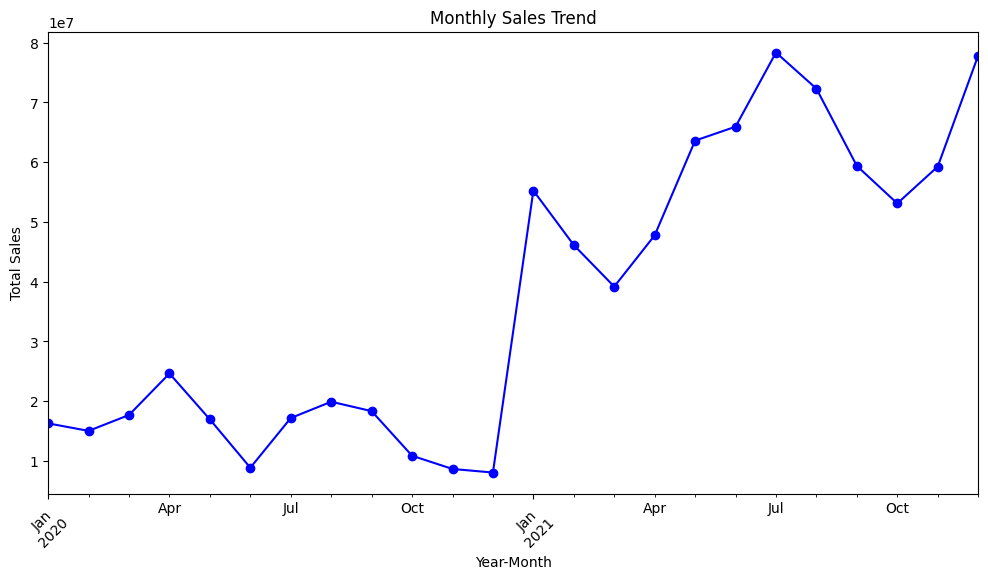

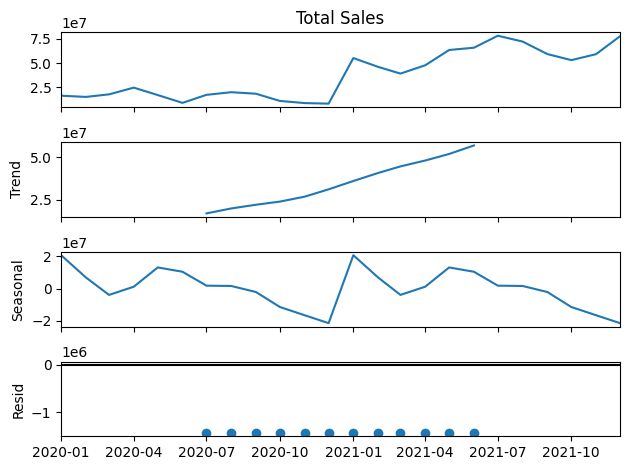

6-Month Forecast:
 2022-01-01    7.534381e+07
2022-02-01    7.421258e+07
2022-03-01    7.369482e+07
2022-04-01    7.345785e+07
2022-05-01    7.334939e+07
2022-06-01    7.329975e+07
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Aggregate total sales by month
monthly_sales = df.groupby('Year-Month')['Total Sales'].sum()

# Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Forecasting future sales using ARIMA model
sales_ts = monthly_sales.to_timestamp()  # Convert to time series format

# Decompose time series
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='additive', period=12)
decomposition.plot()
plt.show()

# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(sales_ts, order=(1, 1, 1))
model_fit = model.fit()

# Forecast for the next 6 months
forecast = model_fit.forecast(steps=6)
print("6-Month Forecast:\n", forecast)

In [ ]:
# Top 10 most profitable products
top_products = df.groupby('Product')['Operating Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Profitable Products:\n", top_products)

# Top 10 most profitable states
top_states = df.groupby('State')['Operating Profit'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Profitable States:\n", top_states)

# Most profitable regions
region_profit = df.groupby('Region')['Operating Profit'].sum().sort_values(ascending=False)
print("Profit by Region:\n", region_profit)


Top 10 Most Profitable Products:
 Product
Men's Street Footwear        82802260.62
Women's Apparel              68650970.56
Men's Athletic Footwear      51846888.19
Women's Street Footwear      45095826.81
Men's Apparel                44763030.33
Women's Athletic Footwear    38975784.94
Name: Operating Profit, dtype: float64
Top 10 Most Profitable States:
 State
New York          23329824.07
Florida           20926206.92
California        19301170.40
Texas             18688204.35
South Carolina    11324236.39
North Carolina     9756422.87
Louisiana          9417233.49
Alabama            9147581.39
Tennessee          8493660.06
Michigan           8135894.02
Name: Operating Profit, dtype: float64
Profit by Region:
 Region
West         89609406.55
Northeast    68020587.65
South        61138004.07
Southeast    60555416.70
Midwest      52811346.48
Name: Operating Profit, dtype: float64


Revenue by Sales Method:
 Sales Method
In-store    356643750.0
Online      247672882.0
Outlet      295585493.0
Name: Total Sales, dtype: float64
Profit by Sales Method:
 Sales Method
In-store    1.275913e+08
Online      9.655518e+07
Outlet      1.079883e+08
Name: Operating Profit, dtype: float64


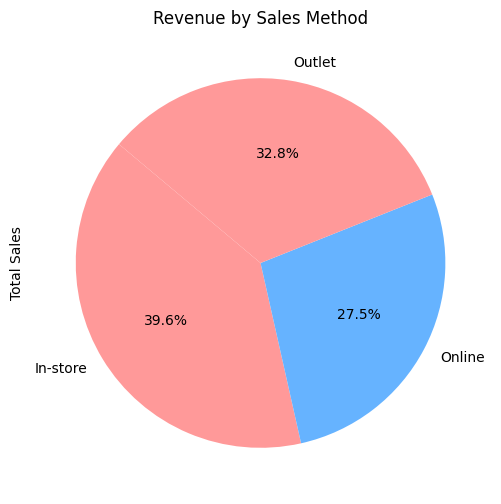

In [ ]:
import seaborn as sns

# Revenue by Sales Method
sales_method = df.groupby('Sales Method')['Total Sales'].sum()
profit_method = df.groupby('Sales Method')['Operating Profit'].sum()

print("Revenue by Sales Method:\n", sales_method)
print("Profit by Sales Method:\n", profit_method)

# Visualize the split of revenue by sales method
plt.figure(figsize=(6, 6))
sales_method.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Revenue by Sales Method')
plt.show()


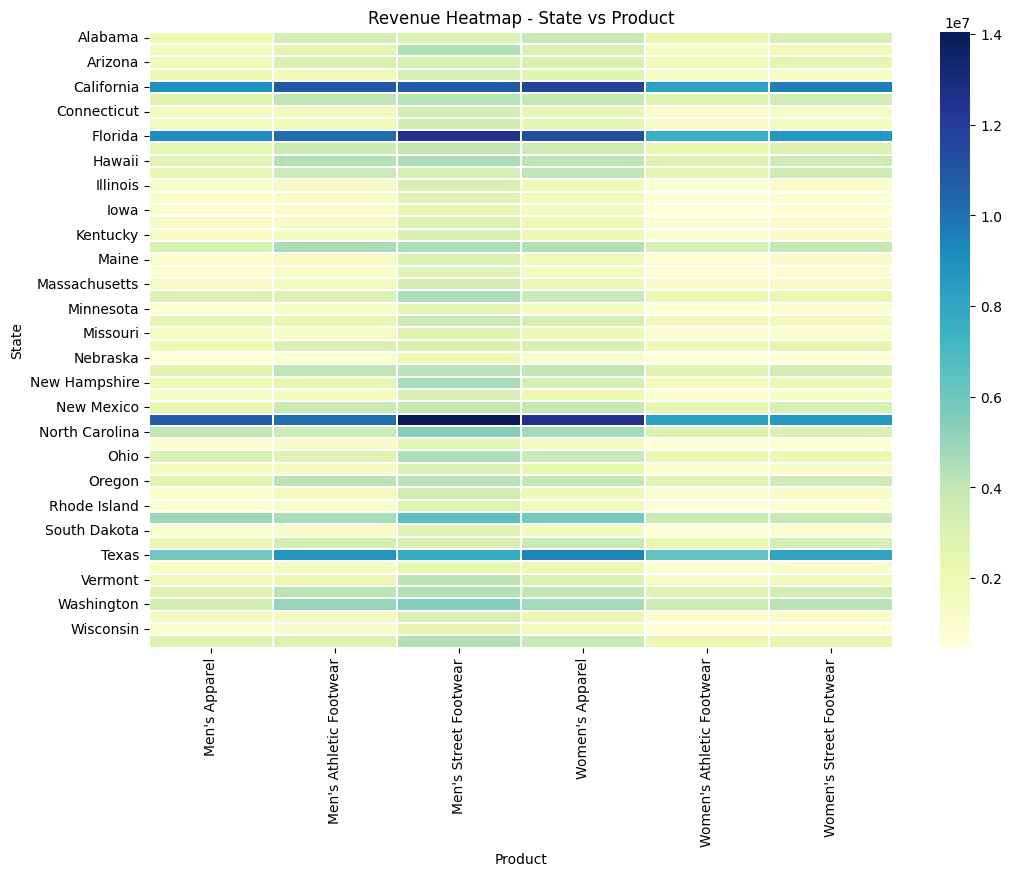

In [ ]:
# Heatmap of Revenue by State and Product
pivot = df.pivot_table(values='Total Sales', index='State', columns='Product', aggfunc='sum', fill_value=0)

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.1)
plt.title('Revenue Heatmap - State vs Product')
plt.xlabel('Product')
plt.ylabel('State')
plt.show()


<ipython-input-8-b2b6d44ab027>:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Sales Growth'] = df['Monthly Sales'].pct_change() * 100
<ipython-input-8-b2b6d44ab027>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_retailers.values, y=top_10_retailers.index, palette='viridis')


Month-on-Month Sales Growth:
      Year-Month  Sales Growth
0       2020-01           NaN
1       2020-01           NaN
2       2020-01           NaN
3       2020-01           NaN
4       2020-01           NaN
...         ...           ...
9643    2021-01           NaN
9644    2021-01           NaN
9645    2021-02           NaN
9646    2021-02           NaN
9647    2021-02           NaN

[9648 rows x 2 columns]


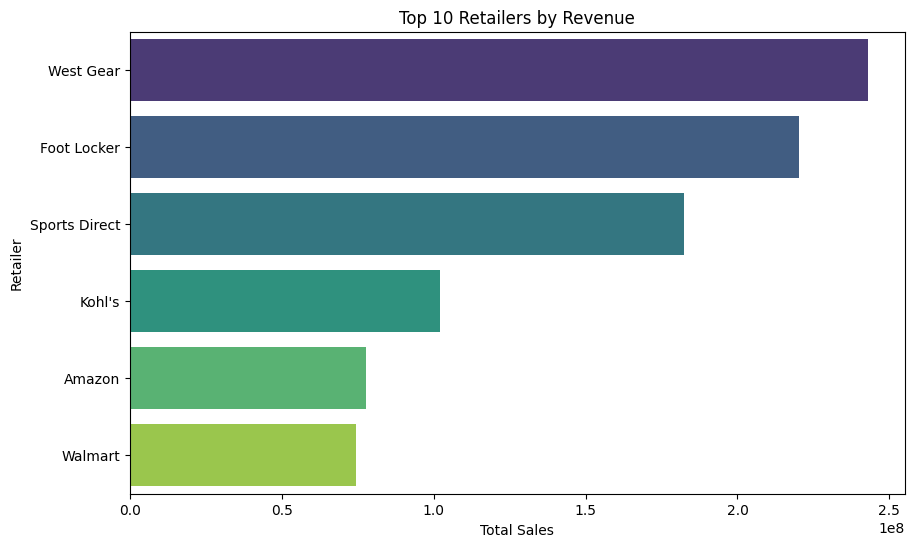

In [ ]:
# Month-on-month sales growth
df['Monthly Sales'] = df.groupby(['Year-Month'])['Total Sales'].sum()
df['Sales Growth'] = df['Monthly Sales'].pct_change() * 100

# Print Month-on-Month Growth
print("Month-on-Month Sales Growth:\n", df[['Year-Month', 'Sales Growth']])

# Retailer Performance
retailer_sales = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
top_10_retailers = retailer_sales.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_retailers.values, y=top_10_retailers.index, palette='viridis')
plt.title('Top 10 Retailers by Revenue')
plt.xlabel('Total Sales')
plt.show()

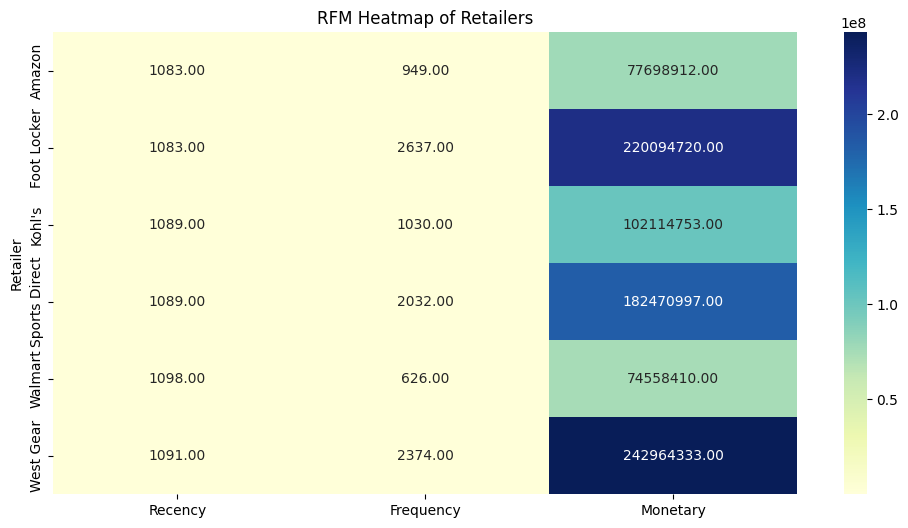

In [ ]:
# Calculate Recency, Frequency, and Monetary values
import datetime as dt

# Set the current date (Assuming today's date is 2024-12-18)
today = dt.datetime(2024, 12, 18)

# Calculate Recency (days since last purchase)
rfm = df.groupby('Retailer').agg({
    'Invoice Date': lambda x: (today - x.max()).days,
    'Retailer ID': 'count',  # Frequency (total transactions)
    'Total Sales': 'sum'     # Monetary value (total revenue)
}).rename(columns={
    'Invoice Date': 'Recency',
    'Retailer ID': 'Frequency',
    'Total Sales': 'Monetary'
})

# Normalize the RFM values
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Create the RFM segment
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Visualize as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']], annot=True, fmt=".2f", cmap='YlGnBu') # Changed fmt to ".2f" to display floats with 2 decimal places
plt.title('RFM Heatmap of Retailers')
plt.show()

In [ ]:
# Visualize as heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']], annot=True, fmt=".2f", cmap='YlGnBu') # Changed fmt to ".2f" to display floats with 2 decimal places
plt.title('RFM Heatmap of Retailers')
plt.show()

NameError: name 'rfm' is not defined

<Figure size 1200x600 with 0 Axes>

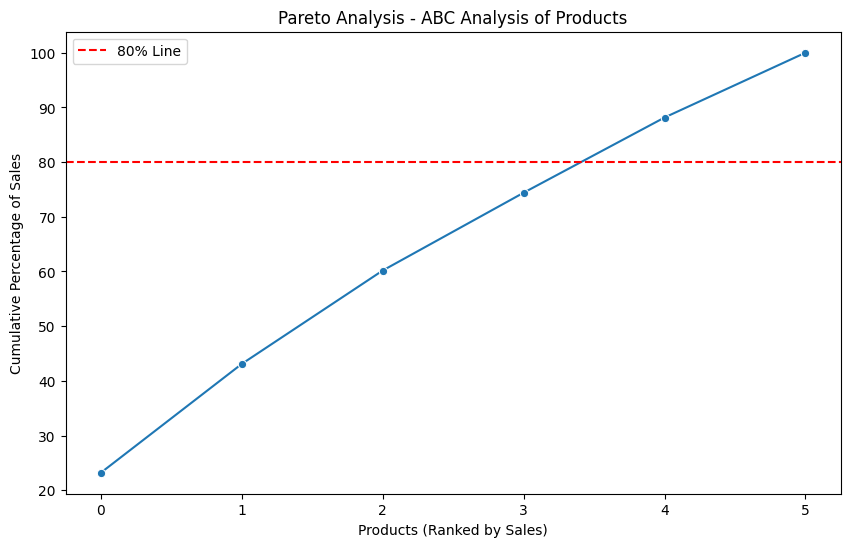

In [ ]:
# Calculate total sales for each product
product_sales = df.groupby('Product')['Total Sales'].sum().reset_index().sort_values(by='Total Sales', ascending=False)

# Calculate cumulative percentage of total sales
product_sales['Cumulative Sales'] = product_sales['Total Sales'].cumsum()
product_sales['Cumulative Percentage'] = 100 * product_sales['Cumulative Sales'] / product_sales['Total Sales'].sum()

# Identify top 20% products that contribute to 80% of sales
top_20_percent_products = product_sales[product_sales['Cumulative Percentage'] <= 80]

# Plot cumulative distribution
plt.figure(figsize=(10, 6))
sns.lineplot(data=product_sales, x=range(len(product_sales)), y='Cumulative Percentage', marker='o')
plt.axhline(y=80, color='r', linestyle='--', label='80% Line')
plt.title('Pareto Analysis - ABC Analysis of Products')
plt.xlabel('Products (Ranked by Sales)')
plt.ylabel('Cumulative Percentage of Sales')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

# Get sales for 2 months for comparison (e.g., November vs December)
monthly_sales = df.groupby(['Year-Month', 'Retailer'])['Total Sales'].sum().unstack().fillna(0)
nov_sales = monthly_sales.loc['2020-11']
dec_sales = monthly_sales.loc['2020-12']

# Create Sankey Diagram Data
source = ['November'] * len(nov_sales)
target = ['December'] * len(dec_sales)
value = dec_sales.values - nov_sales.values

# Remove negative values (for simplicity)
value = [v if v > 0 else 0 for v in value]

# Create Sankey Diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["November", "December"]
    ),
    link=dict(
        source=[0] * len(target),
        target=[1] * len(target),
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram - Retailer Sales Journey", font_size=10)
fig.show()

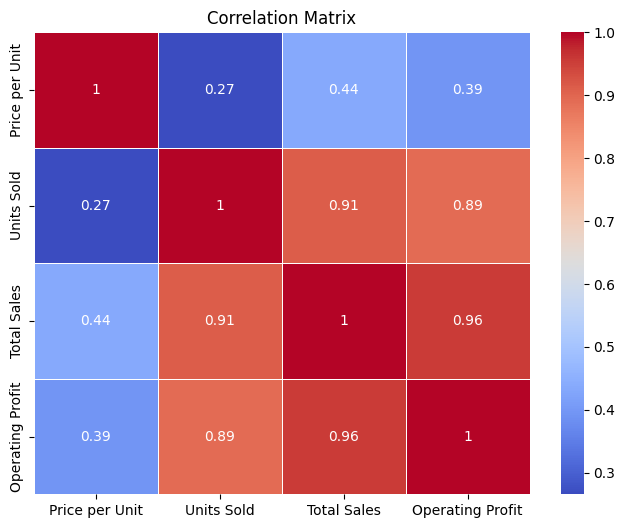

In [ ]:
# Convert 'Units Sold' to numeric (remove commas)
df['Units Sold'] = df['Units Sold'].replace(',', '', regex=True).astype(float)

# Select relevant columns for analysis
correlation_data = df[['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit']]

# Calculate and visualize the correlation matrix
corr = correlation_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-14-84b68d75c581>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




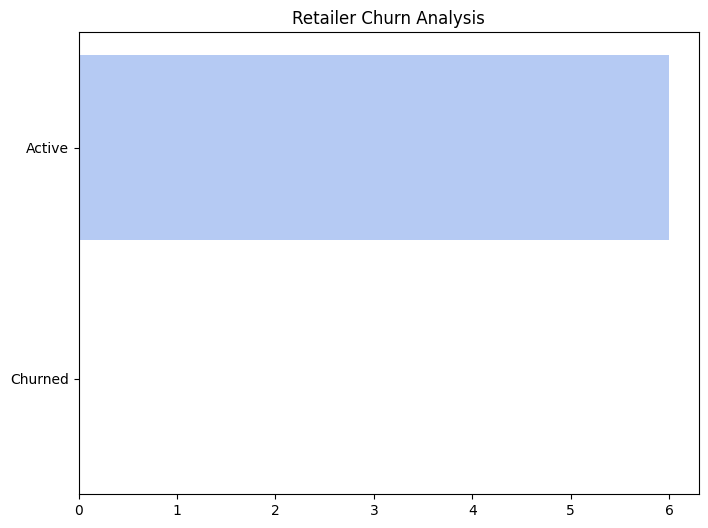

In [ ]:
# Get the last 3 months
latest_date = df['Invoice Date'].max()
three_months_ago = latest_date - pd.DateOffset(months=3)

# Identify churned retailers
retailers_active = df[df['Invoice Date'] > three_months_ago]['Retailer'].unique()
all_retailers = df['Retailer'].unique()
churned_retailers = list(set(all_retailers) - set(retailers_active))

# Plot churned retailers count
plt.figure(figsize=(8, 6))
sns.barplot(x=[len(retailers_active), len(churned_retailers)], y=['Active', 'Churned'], palette='coolwarm')
plt.title('Retailer Churn Analysis')
plt.show()


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Transform data into "basket format"
basket = df.groupby(['Retailer', 'Product'])['Units Sold'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

<ipython-input-15-3b87d5702b76>:5: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# ... (rest of your code)
# Transform data into "basket format"
basket = df.groupby(['Retailer', 'Product'])['Units Sold'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Get the total number of itemsets
num_itemsets = len(frequent_itemsets)

# Generate association rules, providing num_itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1, support_only=False, num_itemsets=num_itemsets)

# Display top rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

                   antecedents                  consequents  support  \
0    (Men's Athletic Footwear)              (Men's Apparel)      1.0   
1              (Men's Apparel)    (Men's Athletic Footwear)      1.0   
2      (Men's Street Footwear)              (Men's Apparel)      1.0   
3              (Men's Apparel)      (Men's Street Footwear)      1.0   
4            (Women's Apparel)              (Men's Apparel)      1.0   
5              (Men's Apparel)            (Women's Apparel)      1.0   
6  (Women's Athletic Footwear)              (Men's Apparel)      1.0   
7              (Men's Apparel)  (Women's Athletic Footwear)      1.0   
8    (Women's Street Footwear)              (Men's Apparel)      1.0   
9              (Men's Apparel)    (Women's Street Footwear)      1.0   

   confidence  lift  
0         1.0   1.0  
1         1.0   1.0  
2         1.0   1.0  
3         1.0   1.0  
4         1.0   1.0  
5         1.0   1.0  
6         1.0   1.0  
7         1.0   1.0  
8        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-18-6bdedcda0dbd>:6: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/association_rules.py:182: RuntimeWarning:

invalid value encountered in divide

